# Florencia: Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Carga de datos
cd = pd.read_csv('listings - Florencia_clean.csv')
cd.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13


### Tratamiento de los Datos

In [3]:
# ---------------------------------------------------------------------------------
# 1) Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float
# ---------------------------------------------------------------------------------
cd = cd[cd['host_acceptance_rate'] != 'S/D']
cd['host_acceptance_rate'] = (
    cd['host_acceptance_rate']
    .str.replace('%', '')
    .astype(float)
)
# ---------------------------------------------------------------------------------
# 2) Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero
# ---------------------------------------------------------------------------------
cd['host_is_superhost'] = (
    cd['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)
# ---------------------------------------------------------------------------------
# 3) Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas
# ---------------------------------------------------------------------------------
cd['bathrooms'] = (
    cd['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
cd = cd[cd['bathrooms'].notnull()]

# ---------------------------------------------------------------------------------
# 4) Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
cd['instant_bookable'] = (
    cd['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)

# ---------------------------------------------------------------------------------
# 5) Convertir "host_identity_verified" a valores numéricos
#    - Misma lógica: 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
cd['host_identity_verified'] = (
    cd['host_identity_verified']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita
)

# ---------------------------------------------------------------------------------
# 6) Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in bed and breakfast': 4,
    'Entire home': 5,
    'Private room in condo': 6
}
cd['property_type'] = cd['property_type'].replace(types)


/tmp/ipykernel_71806/2950152231.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_71806/2950152231.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_71806/2950152231.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [4]:
# -------------------------------------------------------------------------
# 1) Crear dataframes separados según el tipo de habitación ('room_type')
#    - Se filtra el dataframe original (cd) según los valores de la columna room_type.
# -------------------------------------------------------------------------
cd_entire = cd[cd['room_type'] == 'Entire home/apt']   # Alojamientos completos
cd_private = cd[cd['room_type'] == 'Private room']     # Habitaciones privadas
cd_shared = cd[cd['room_type'] == 'Shared room']       # Habitaciones compartidas
cd_hotel = cd[cd['room_type'] == 'Hotel room']         # Habitaciones de hotel

# -------------------------------------------------------------------------
# 2) Mostrar la frecuencia de cada tipo de habitación en cada subset
#    - Utilizamos 'value_counts()' para contar cuántas filas hay de cada tipo.
#    - El argumento 'end="\n\n"' agrega un salto de línea extra entre cada impresión.
# -------------------------------------------------------------------------
print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')


room_type
Entire home/apt    10146
Name: count, dtype: int64

room_type
Private room    1850
Name: count, dtype: int64

room_type
Shared room    34
Name: count, dtype: int64

room_type
Hotel room    81
Name: count, dtype: int64



### x = host_acceptance_rate, y = price

#### entire home/apt

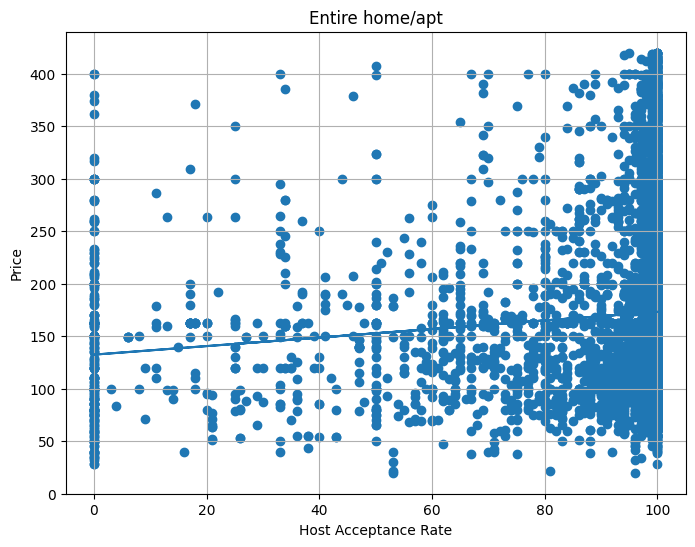

In [5]:
# ---------------------------------------------------------------------------------
# 1) Crear y ajustar un modelo de regresión lineal
#    - Usamos 'host_acceptance_rate' como variable independiente (X).
#    - Definimos 'price' como variable dependiente (y).
# ---------------------------------------------------------------------------------
model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])

# ---------------------------------------------------------------------------------
# 2) Visualizar la regresión lineal
#    - Generamos un diagrama de dispersión (scatter plot) con los datos reales.
#    - Sobre la misma gráfica, dibujamos la línea de mejor ajuste que produce el modelo.
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'])
plt.plot(
    cd_entire[['host_acceptance_rate']],
    model.predict(cd_entire[['host_acceptance_rate']])
)
plt.title('Entire home/apt')         # Título de la gráfica
plt.xlabel('Host Acceptance Rate')   # Etiqueta del eje X
plt.ylabel('Price')                  # Etiqueta del eje Y
plt.grid(True)                       # Muestra una cuadrícula para facilitar la lectura
plt.show()                           # Muestra la gráfica


In [6]:
# ---------------------------------------------------------------------------------
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
#    - model.coef_: array con la(s) pendiente(s) de la(s) variable(s) independiente(s).
#    - model.intercept_: valor del intercepto (b) en la regresión lineal.
# ---------------------------------------------------------------------------------
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# ---------------------------------------------------------------------------------
# 2) Representar el modelo lineal de forma explícita
#    - Mostramos la ecuación en el formato y = m*x + b.
# ---------------------------------------------------------------------------------
print(f'y = {m[0]}x + {b}', end='\n\n')

# ---------------------------------------------------------------------------------
# 3) Evaluar el modelo con un indicador de desempeño
#    - Utilizamos model.score() para obtener el R^2, que mide qué tan bien el modelo
#      se ajusta a los datos (1 significa un ajuste perfecto, 0 significa nulo).
# ---------------------------------------------------------------------------------
print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))


Pendiente: [0.40719557]
Intercepto: 132.45200177269956
y = 0.4071955719319954x + 132.45200177269956

Puntaje del modelo: 0.009142835556257833


#### private room

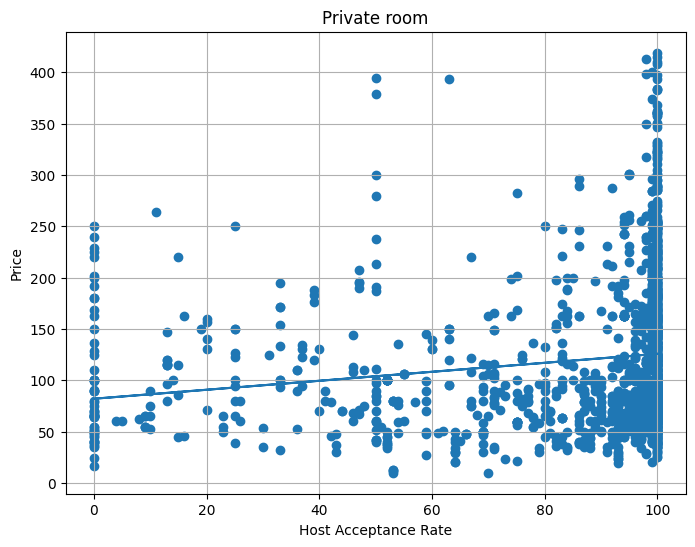

In [7]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'])
plt.plot(
    cd_private[['host_acceptance_rate']],
    model.predict(cd_private[['host_acceptance_rate']])
)
plt.title('Private room')           # Título de la gráfica
plt.xlabel('Host Acceptance Rate')  # Etiqueta del eje X
plt.ylabel('Price')                 # Etiqueta del eje Y
plt.grid(True)                      # Activa la cuadrícula para una lectura más sencilla
plt.show()                          # Muestra la gráfica


In [8]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))


Pendiente: [0.43743628]
Intercepto: 82.03849929927937
y = 0.43743628287372965x + 82.03849929927937

Puntaje del modelo: 0.023132074698248406


#### shared room

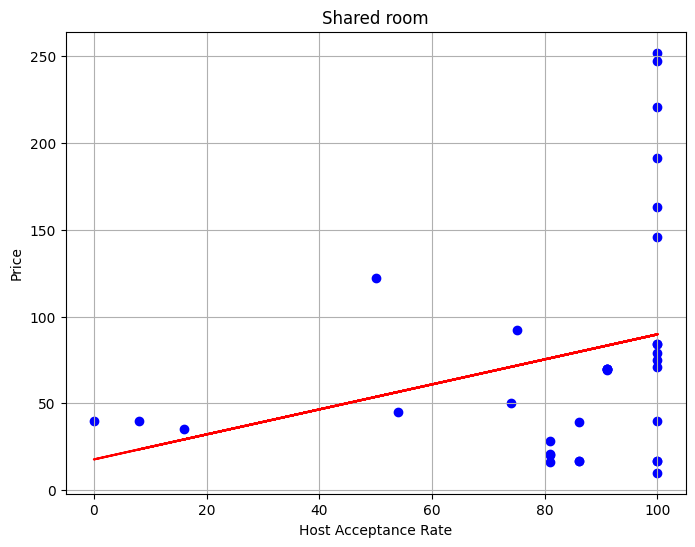

In [9]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_acceptance_rate']],
    model.predict(cd_shared[['host_acceptance_rate']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [10]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

Pendiente: [0.72074055]
Intercepto: 17.656944032066534
y = 0.7207405482977036x + 17.656944032066534

Puntaje del modelo: 0.08308520183468315


#### hotel room

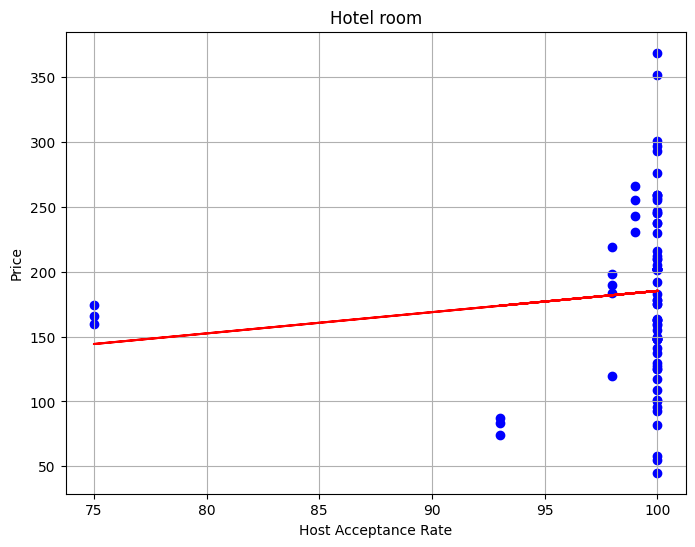

In [11]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_acceptance_rate']], 
    model.predict(cd_hotel[['host_acceptance_rate']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [12]:
# 1) Obtener los parámetros de la regresión lineal en habitaciones privadas
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Mostrar la ecuación resultante del modelo
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el rendimiento del modelo mediante el coeficiente de determinación (R²)
print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

Pendiente: [1.6392733]
Intercepto: 21.33588064520336
y = 1.6392733000924316x + 21.33588064520336

Puntaje del modelo: 0.014556666471630342


### x = host_is_superhost, y = price

#### Entire home/apt

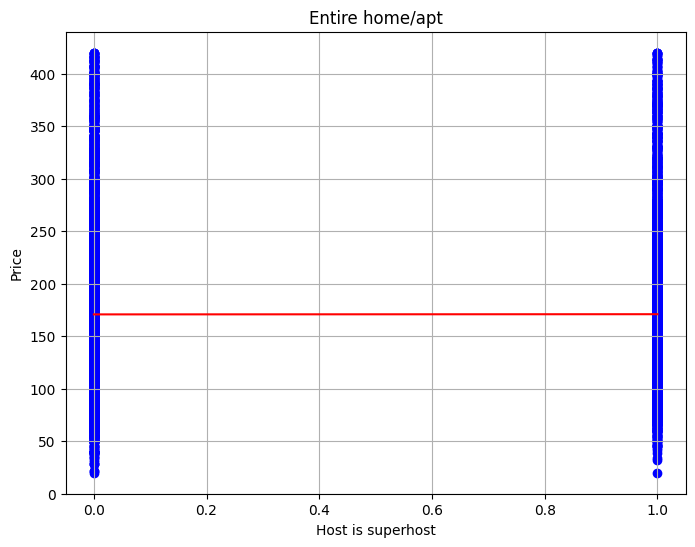

In [13]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_is_superhost']], 
    model.predict(cd_entire[['host_is_superhost']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [14]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

Pendiente: [1.6392733]
Intercepto: 170.79160837122538
y = 1.6392733000924316x + 170.79160837122538

Puntaje del modelo: 1.4051575117912662e-06


#### private room

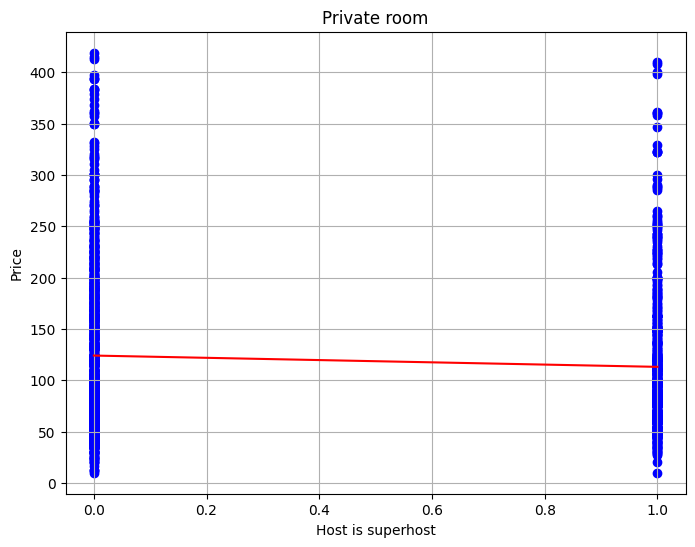

In [15]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_is_superhost']],
    model.predict(cd_private[['host_is_superhost']]), color='red'
)
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [16]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

Pendiente: [-10.99455547]
Intercepto: 124.09349726775957
y = -10.994555468817772x + 124.09349726775957

Puntaje del modelo: 0.005392304029765427


#### shared room

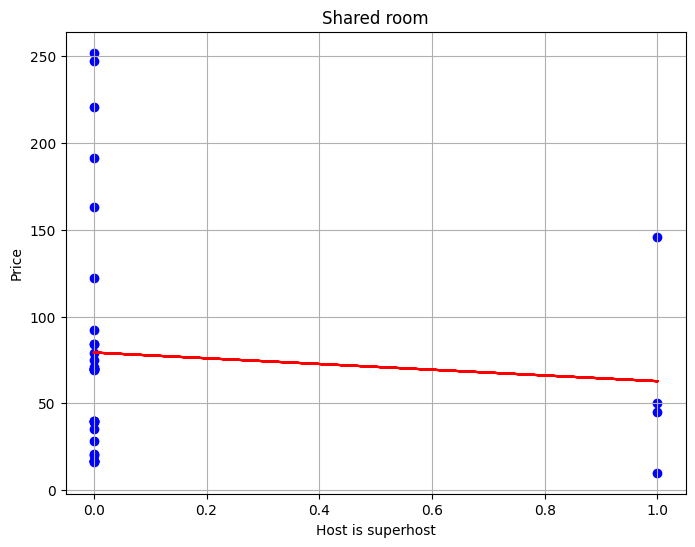

In [17]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_is_superhost']], model.predict(cd_shared[['host_is_superhost']]), color='red')
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [18]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

Pendiente: [-16.5]
y = -16.499999999999996x + 79.25

Puntaje del modelo: 0.006464449952627183


#### hotel room

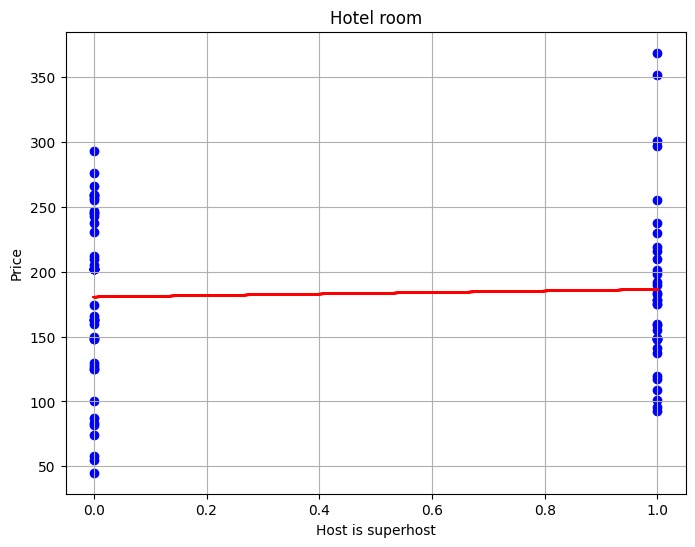

In [19]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_is_superhost']],
    model.predict(cd_hotel[['host_is_superhost']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [20]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

Pendiente: [5.82111801]
Intercepto: 180.52173913043478
y = 5.821118012422355x + 180.52173913043478

Puntaje del modelo: 0.0019236814704433058


### x = bathrooms, y = accomodates

#### Entire home/apt

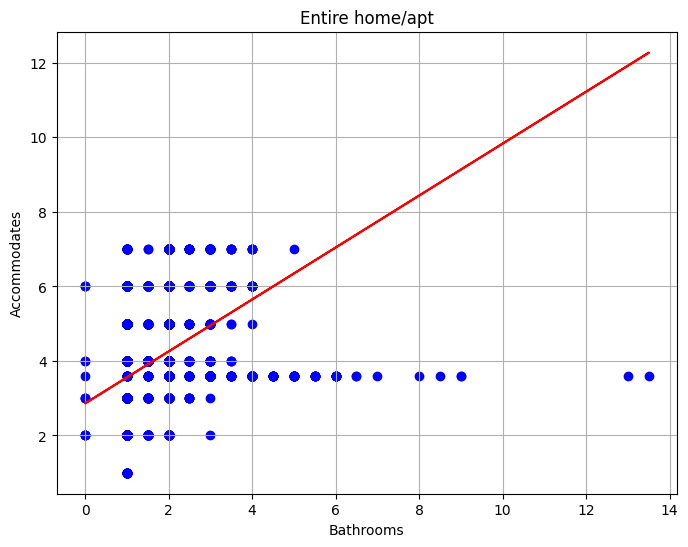

In [21]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(
    cd_entire[['bathrooms']],
    model.predict(cd_entire[['bathrooms']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [22]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

Pendiente: [0.69712209]
Intercepto: 2.859730427454926
y = 0.6971220917000263x + 2.859730427454926

Puntaje del modelo: 0.13136550092928556


#### Private room

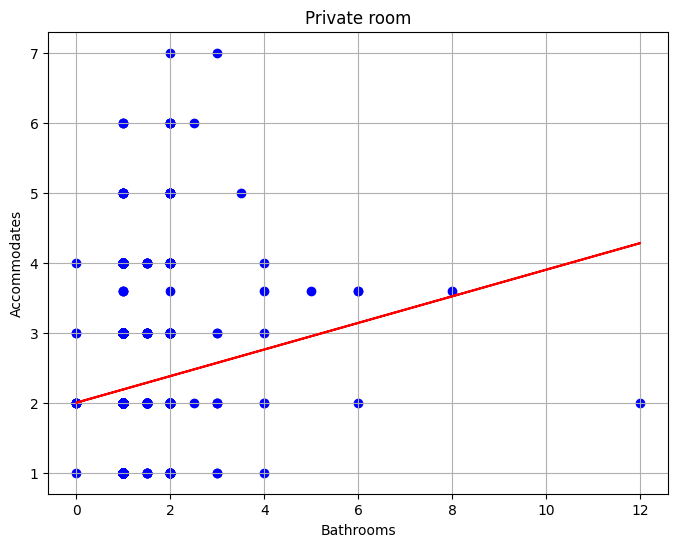

In [23]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(
    cd_private[['bathrooms']],
    model.predict(cd_private[['bathrooms']]), color='red'
)
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [24]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

Pendiente: [0.18989799]
Intercepto: 2.0005613223275476
y = 0.18989799459691137x + 2.0005613223275476

Puntaje del modelo: 0.013570703675251039


#### shared room

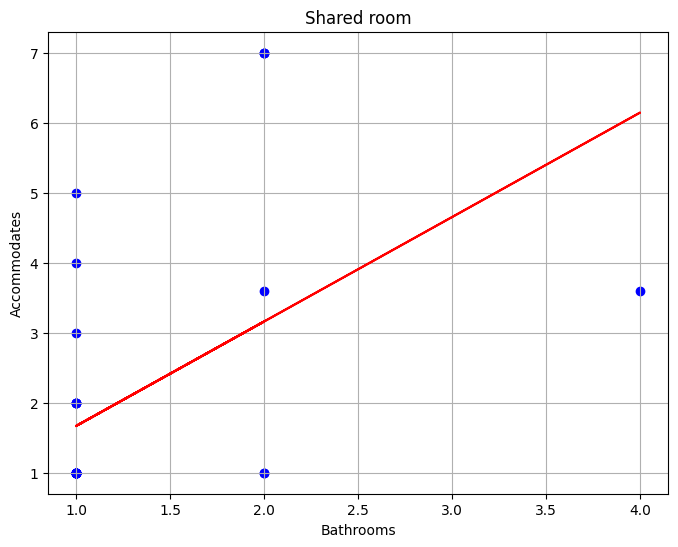

In [25]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(
    cd_shared[['bathrooms']], 
    model.predict(cd_shared[['bathrooms']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [26]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

Pendiente: [1.49137529]
Intercepto: 0.17855477855477808
y = 1.491375291375292x + 0.17855477855477808

Puntaje del modelo: 0.24197916216662219


#### hotel room

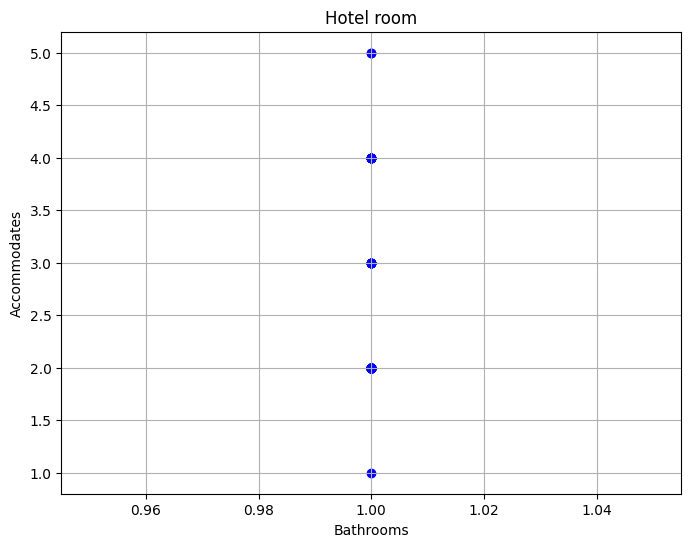

In [27]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(
    cd_hotel[['bathrooms']],
    model.predict(cd_hotel[['bathrooms']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [28]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

Pendiente: [0.]
Intercepto: 2.3950617283950617
y = 0.0x + 2.3950617283950617

Puntaje del modelo: 0.0


### x = review_score_cleanliness, y = price

#### Entire home/apt

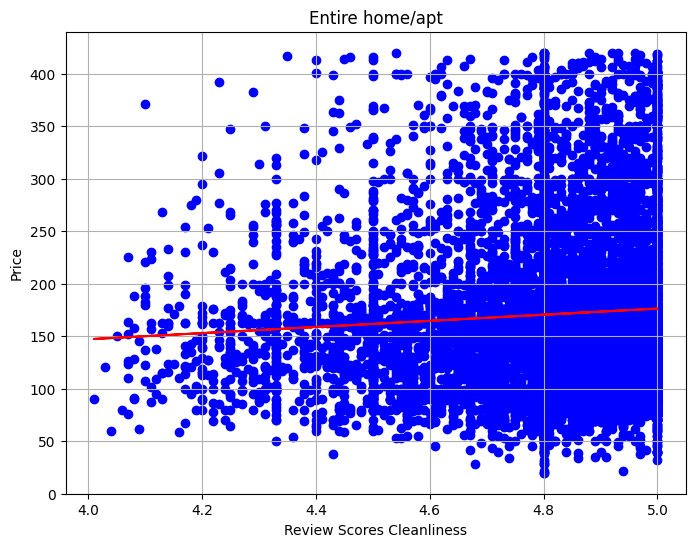

In [29]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['review_scores_cleanliness']], 
    model.predict(cd_entire[['review_scores_cleanliness']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [30]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

Pendiente: [29.24237351]
y = 29.242373508029978x + 30.130225690543057

Puntaje del modelo: 0.004959676048940653


#### private room

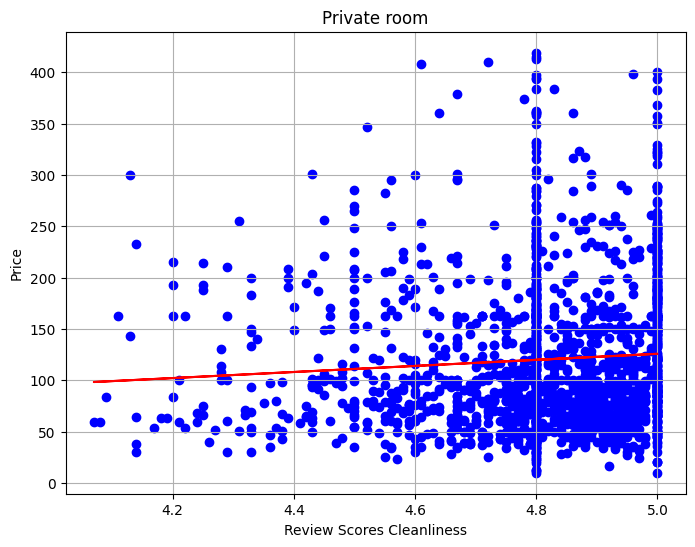

In [31]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['review_scores_cleanliness']],
    model.predict(cd_private[['review_scores_cleanliness']]), color='red'
)
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [32]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))

Pendiente: [29.56944757]
y = 29.569447567443014x + -22.022210081726058

Puntaje del modelo: 0.005321538552323868


#### shared room

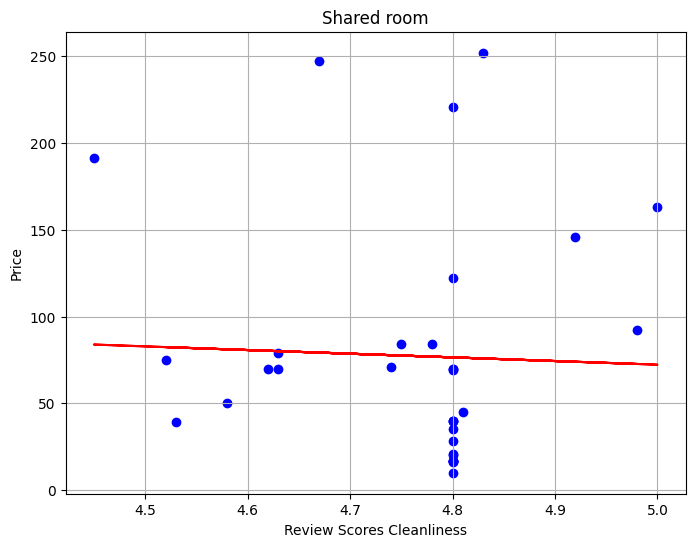

In [33]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['review_scores_cleanliness']],
    model.predict(cd_shared[['review_scores_cleanliness']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [34]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

Pendiente: [-21.11040068]
y = -21.11040068201169x + 177.79433077578744

Puntaje del modelo: 0.0014067350758651953


#### hotel room

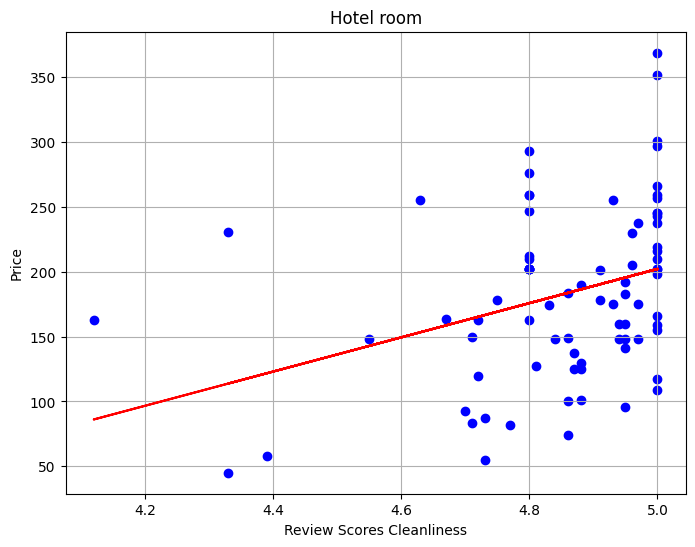

In [35]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['review_scores_cleanliness']], model.predict(cd_hotel[['review_scores_cleanliness']]), color='red')
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [36]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

Pendiente: [131.94882047]
Intercepto: -457.53376138184353
y = 131.948820466214x + -457.53376138184353

Puntaje del modelo: 0.11402441417579212


### host_idendity_verified, y = price

#### Entire home/apt

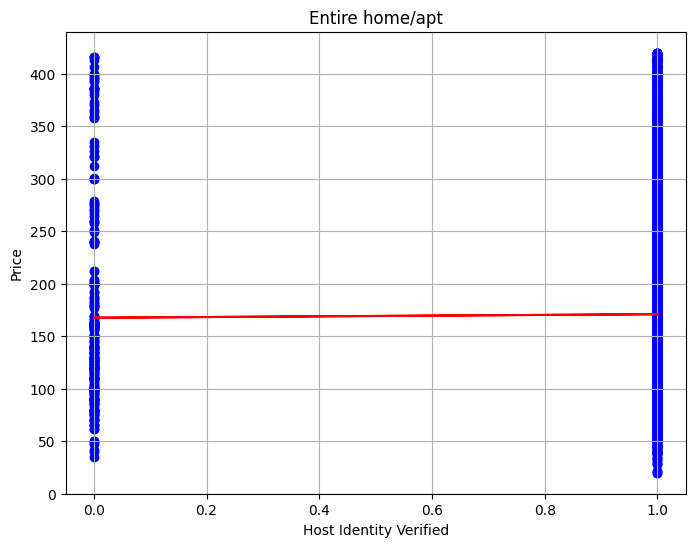

In [37]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_identity_verified']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_identity_verified']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_identity_verified']], model.predict(cd_entire[['host_identity_verified']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [38]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_identity_verified']], cd_entire['price']))

Pendiente: [3.37292715]
Intercepto: 167.59619686800897
y = 3.3729271504042546x + 167.59619686800897

Puntaje del modelo: 5.7346172444017185e-05


#### private room

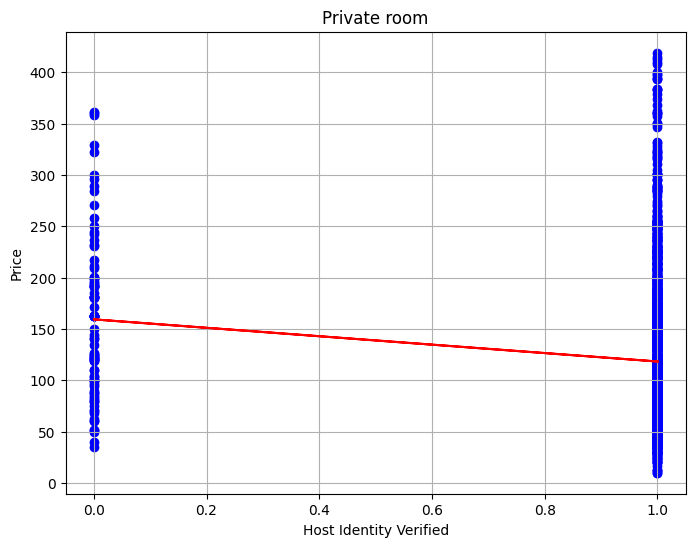

In [39]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_identity_verified']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_identity_verified']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_identity_verified']],
    model.predict(cd_private[['host_identity_verified']]), color='red'
)
plt.title('Private room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [40]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_identity_verified']], cd_private['price']))

Pendiente: [-41.02022967]
Intercepto: 159.32971014492753
y = -41.02022967469621x + 159.32971014492753

Puntaje del modelo: 0.01579506853395174


#### shared room

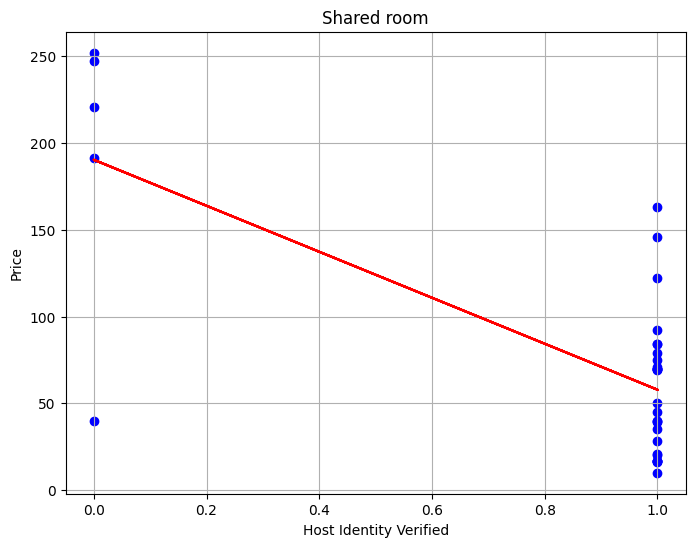

In [41]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_identity_verified']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_identity_verified']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_identity_verified']],
    model.predict(cd_shared[['host_identity_verified']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [42]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_identity_verified']], cd_shared['price']))

Pendiente: [-132.47241379]
Intercepto: 190.3
y = -132.47241379310347x + 190.3

Puntaje del modelo: 0.5035021677712399


#### hotel room

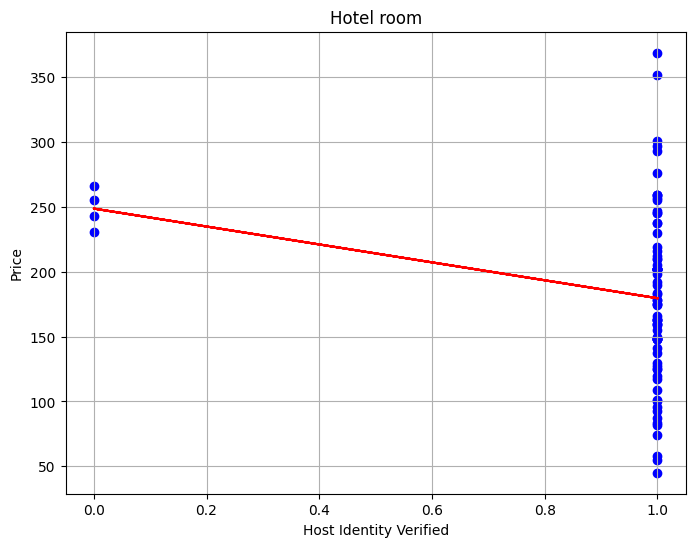

In [43]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_identity_verified']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_identity_verified']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_identity_verified']],
    model.predict(cd_hotel[['host_identity_verified']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [44]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_identity_verified']], cd_hotel['price']))

Pendiente: [-69.12662338]
Intercepto: 248.74999999999997
y = -69.12662337662334x + 248.74999999999997

Puntaje del modelo: 0.05189623855919134


### x = instant_bookable, y = price

#### Entire home/apt

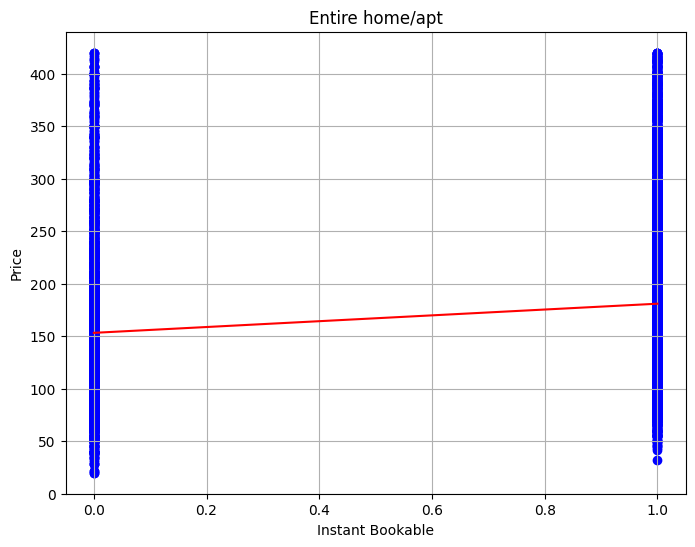

In [45]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['instant_bookable']],
    model.predict(cd_entire[['instant_bookable']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [46]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

Pendiente: [27.75941316]
Intercepto: 153.2146764148389
y = 27.759413155903438x + 153.2146764148389

Puntaje del modelo: 0.03154189226715165


#### private room

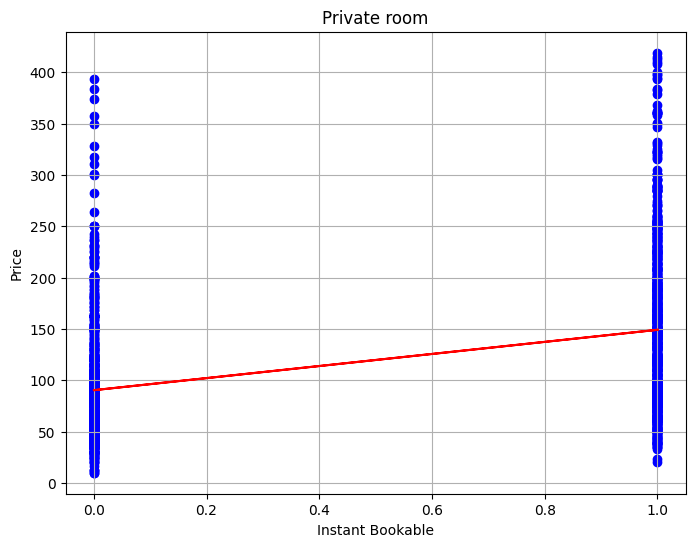

In [47]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['instant_bookable']],
    model.predict(cd_private[['instant_bookable']]), color='red'
)
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [48]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

Pendiente: [58.79143888]
Intercepto: 90.3816611539875
y = 58.7914388813607x + 90.3816611539875

Puntaje del modelo: 0.17157965875824588


#### shared room

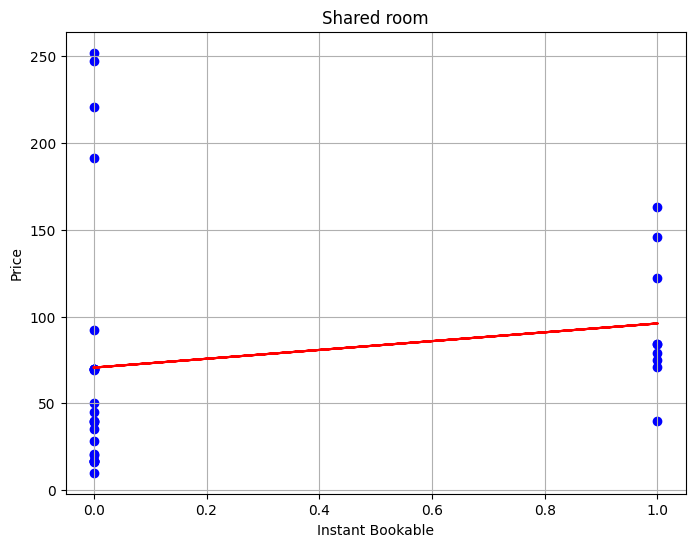

In [49]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['instant_bookable']], model.predict(cd_shared[['instant_bookable']]), color='red')
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [50]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

Pendiente: [25.42]
Intercepto: 70.58
y = 25.420000000000016x + 70.58

Puntaje del modelo: 0.028768422853779452


#### hotel room

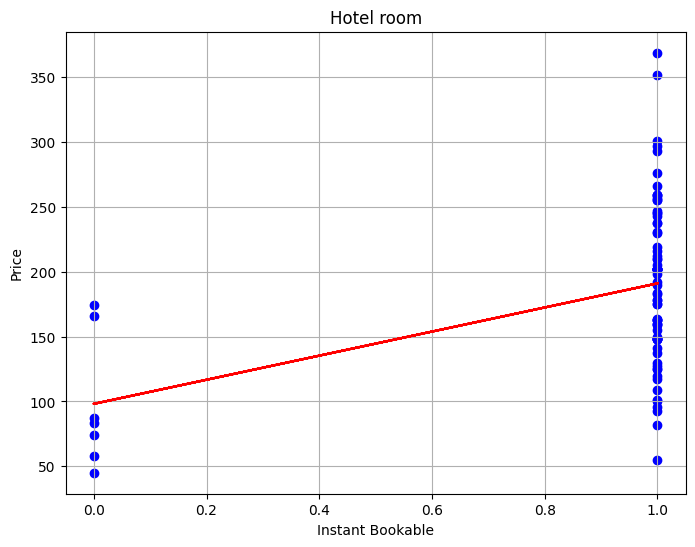

In [51]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['instant_bookable']],
    model.predict(cd_hotel[['instant_bookable']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [52]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

Pendiente: [92.92471042]
Intercepto: 98.14285714285717
y = 92.92471042471041x + 98.14285714285717

Puntaje del modelo: 0.15771996443624126


### x = property_type, y = price

#### Entire home/apt

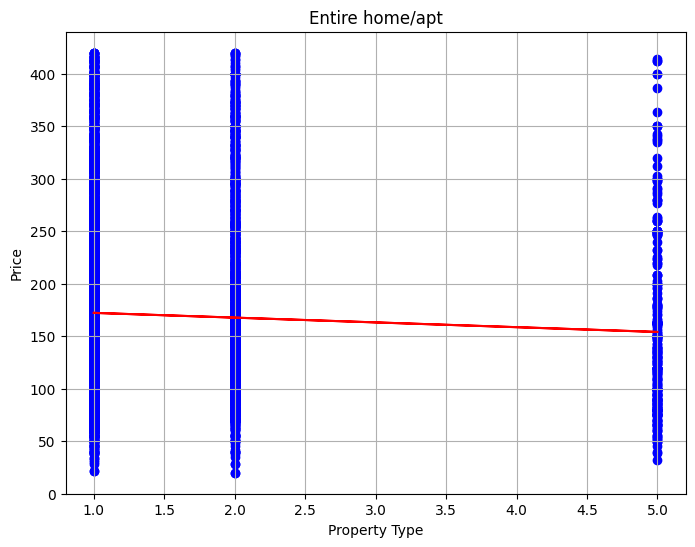

In [53]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_entire
#    - Se utiliza pd.to_numeric(..., errors='coerce') para convertir a numérico
#      y, si no es posible, se asigna NaN (valores no interpretables).
#    - Después, con .notnull() se conservan únicamente los valores válidos.
# ---------------------------------------------------------------------------------
cd_entire = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['property_type']], cd_entire['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['property_type']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['property_type']], model.predict(cd_entire[['property_type']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [54]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['property_type']], cd_entire['price']))

Pendiente: [-4.54614344]
Intercepto: 176.7972452874825
y = -4.546143442841635x + 176.7972452874825

Puntaje del modelo: 0.0024307576437962997


#### private room

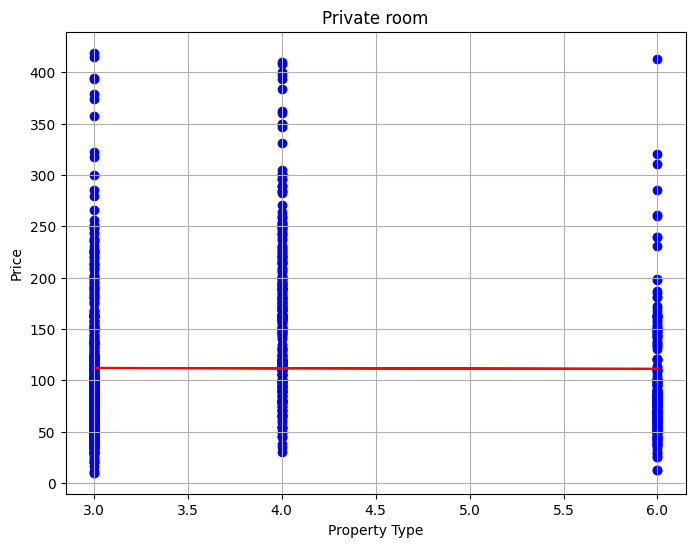

In [55]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_private
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN
#      a valores que no se puedan convertir (errors='coerce').
#    - Mantenemos únicamente los valores no nulos (notnull()).
# ---------------------------------------------------------------------------------
cd_private = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]

# 2) Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['property_type']], cd_private['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['property_type']], cd_private['price'], color='blue')
plt.plot(cd_private[['property_type']], model.predict(cd_private[['property_type']]), color='red')
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [56]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['property_type']], cd_private['price']))

Pendiente: [-0.29352104]
Intercepto: 112.90739711853469
y = -0.2935210372284445x + 112.90739711853469

Puntaje del modelo: 2.5527997609242625e-05


#### shared room

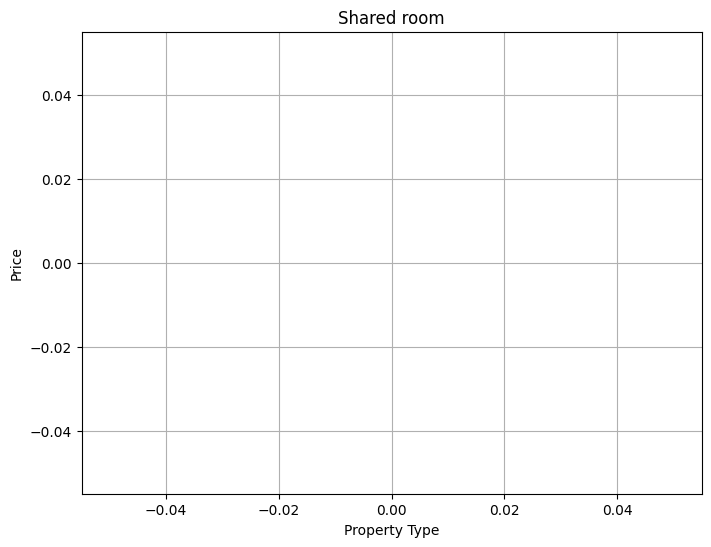

In [57]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_shared
#    - Convertimos la columna a tipo numérico con pd.to_numeric(), asignando NaN a
#      valores no convertibles. Posteriormente, descartamos las filas con NaN.
# ---------------------------------------------------------------------------------
cd_shared = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]

# ---------------------------------------------------------------------------------
# 2) Crear instancia del modelo (aunque en este caso no entrenamos el modelo debido
#    a que al parecer no existen registros de los 6 tipos de propiedad deseados).
# ---------------------------------------------------------------------------------
model = LinearRegression()
# model.fit(...)  # Se ha comentado porque aparentemente no hay datos adecuados para entrenar

# ---------------------------------------------------------------------------------
# 3) Visualizar la distribución de 'property_type' contra 'price'
#    - Trazamos únicamente el diagrama de dispersión (scatter), sin la línea de regresión.
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['property_type']], cd_shared['price'])
#plt.plot(ny_shared[['property_type']], model.predict(ny_shared[['property_type']]), color='red')

plt.title('Shared room')         # Título de la gráfica
plt.xlabel('Property Type')       # Etiqueta del eje X
plt.ylabel('Price')               # Etiqueta del eje Y
plt.grid(True)                    # Cuadrícula para facilitar la lectura
plt.show()                        # Muestra la gráfica

# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------


#### hotel room

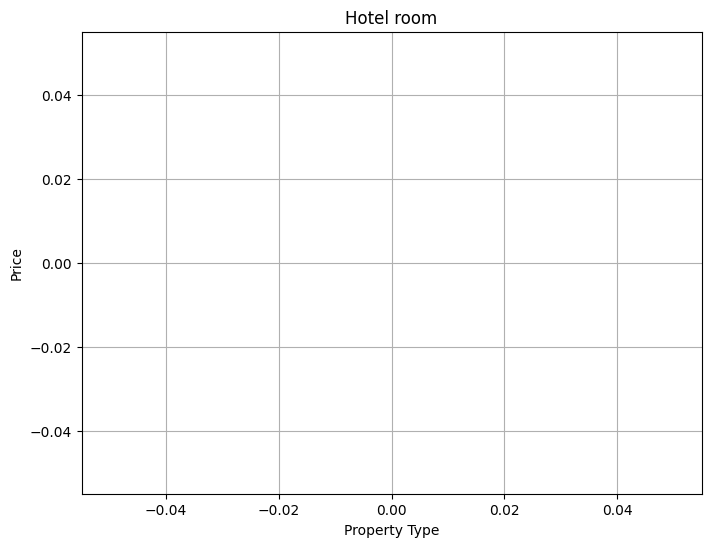

In [58]:
# 1) Filtrar valores no numéricos en la columna "property_type"
cd_hotel = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['property_type']], cd_hotel['price'], color='blue')
#plt.plot(cd_hotel[['property_type']], model.predict(cd_hotel[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# ---------------------------------------------------------------------------------
# Observación:
# Al final, se concluye que ninguna de las habitaciones compartidas posee un
# "property_type" entre los 6 valores más comunes (tal como se codificaron).
# Por ello, no fue posible ajustar ni visualizar la línea de regresión.
# ---------------------------------------------------------------------------------